In [ ]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt


#resimlerin boyutunu bulma
DIR = './color/Apple_Frogeye_Spot'

# Want to know how we should format the height x width image data dimensions
# for inputting to a keras model
def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

get_size_statistics()

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

In [3]:

os.listdir(path='.')
listOfFile = os.listdir("./color")
print(listOfFile[0])
x=len(listOfFile)
#for i in range(0,x):
#    print(listOfFile[i])

Apple_Frogeye_Spot


In [4]:
print(listOfFile[0])
x=len(listOfFile)
listIndex=[]
for i in range(0,x):
    listIndex.append(i)
print(listIndex[0])

Apple_Frogeye_Spot
0


Working with 54238 images
Image examples: 
./color/Apple_Frogeye_Spot/1021c460-93e4-48cd-9c84-c576b2c5117c___JR_FrgE.S 2983.JPG


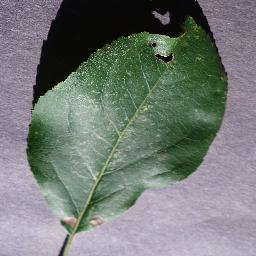

./color/Apple_Frogeye_Spot/1107fc9f-f39f-450f-b928-4742fb82da77___JR_FrgE.S 2775.JPG


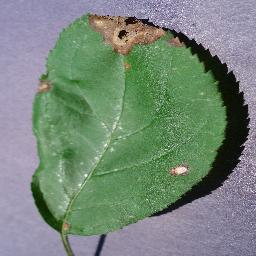

In [5]:
#folder = "./color/Apple_Frogeye_Spot"
onlyfiles=[]
x=len(listOfFile)
for i in range(0,x):
    folder="./color/"+listOfFile[i]
    print
    onlyfiles2 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    for t in range(0, len(onlyfiles2)):
        onlyfiles.append(folder+"/"+onlyfiles2[t])
#onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")
for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=onlyfiles[i], width=256, height=256))

In [ ]:
import re
r1 = re.search(r".+/", onlyfiles[0])
print(onlyfiles[0])
print(r1.group())


In [7]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import re

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    r1 = re.search(r".+/", _file)
    #label_in_file = _file.find("_")
    y_train.append(r1.group())
    i=i+1
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 256
image_height = 256
ratio = 4

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(_file)  # this is a PIL image   #listoffile yerinde folder vardı  listOfFile[i] + "/" +
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((3, 64, 64))
    # Normalize
    #x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 10000 == 0:
        print("%d images to array" % i)
print("All images to array!")
#save('dataset.npy', dataset)

Using TensorFlow backend.


Files in train_files: 54238
3000 images to array
6000 images to array
9000 images to array
12000 images to array
15000 images to array
18000 images to array
21000 images to array
24000 images to array
27000 images to array
30000 images to array
33000 images to array
36000 images to array
39000 images to array
42000 images to array
45000 images to array
48000 images to array
51000 images to array
54000 images to array
All images to array!


In [8]:
print("Files in train_files: %d" % len(train_files))
print("Files in y_train: %d" % len(y_train))

Files in train_files: 54238
Files in y_train: 54238


In [20]:
#y_train=np.array(y_train)
#np.save('y_train.npy',y_train)
#np.save('dataset.npy', dataset)
#dataset=np.load('dataset.npy')

1


In [85]:
dataset=np.load('dataset.npy')
y_train=np.load('y_train.npy')


# data normalization

In [40]:
# Normalize the data
from keras.utils import to_categorical
#y_train = pd.Categorical(y_train).codes
#y_test = pd.Categorical(y_test).codes
#dataset = dataset / 255.0
#y_train = y_train / 255.0
X_train =X_train/255
X_test=X_test/255
#y_test=y_test/255
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (43390, 3, 64, 64)
x_test shape:  (10848, 3, 64, 64)


In [87]:
#reshape data to fit model
x_train = X_train.reshape(43390,64,64,3)
x_test = X_test.reshape(10848,64,64,3)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)

#y_train = pd.Categorical(y_train).codes
#y_test = pd.Categorical(y_test).codes

x train:  (43390, 64, 64, 3)
x test:  (10848, 64, 64, 3)


In [96]:
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]
print(number_of_train,number_of_test)

x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

43390 10848
X train flatten (43390, 12288)
X test flatten (10848, 12288)
x train:  (12288, 43390)
x test:  (12288, 10848)
y train:  (43390,)
y test:  (10848,)


In [86]:
from sklearn.model_selection import train_test_split
#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)
print("Train set size: {0},Test set size: {1}".format(len(X_train),len(X_test)))

Train set size: 43390,Test set size: 10848


In [95]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (43390, 64, 64, 3)
x test:  (10848, 64, 64, 3)
y train:  (43390,)
y test:  (10848,)


In [29]:
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]
print(number_of_train,number_of_test)

43390 10848


# cnn model

In [42]:
#cnn için gerekli one hot encoding
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


x train:  (43390, 64, 64, 3)
x test:  (10848, 64, 64, 3)
y train:  (43390, 38)
y test:  (10848, 38)


In [75]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(76, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(38, activation = "softmax"))

In [76]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [77]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [78]:
epochs = 25  # for better result increase the epochs
batch_size = 125

In [79]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // batch_size)

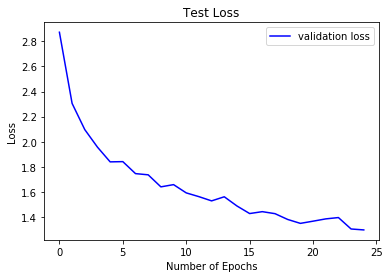

In [104]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [106]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

ValueError: Error when checking input: expected conv2d_19_input to have 4 dimensions, but got array with shape (10848, 12288)

Epoch 1/10
347/347 [==============================] - 76s 220ms/step - loss: 3.1645 - acc: 0.1778 - val_loss: 2.6622 - val_acc: 0.2889
Epoch 2/10
347/347 [==============================] - 67s 194ms/step - loss: 2.7253 - acc: 0.2542 - val_loss: 2.2425 - val_acc: 0.3758
Epoch 3/10
347/347 [==============================] - 69s 198ms/step - loss: 2.5290 - acc: 0.2866 - val_loss: 2.0555 - val_acc: 0.3968
Epoch 4/10
347/347 [==============================] - 67s 192ms/step - loss: 2.4165 - acc: 0.3134 - val_loss: 1.9269 - val_acc: 0.4348
Epoch 5/10
347/347 [==============================] - 66s 191ms/step - loss: 2.3528 - acc: 0.3231 - val_loss: 1.8268 - val_acc: 0.4568
Epoch 6/10
347/347 [==============================] - 68s 195ms/step - loss: 2.2956 - acc: 0.3374 - val_loss: 1.7644 - val_acc: 0.4849
Epoch 7/10
347/347 [==============================] - 70s 201ms/step - loss: 2.2518 - acc: 0.3474 - val_loss: 1.7163 - val_acc: 0.5085
Epoch 8/10
347/347 [==============================] - 67s 193ms/step - loss: 2.2081 - acc: 0.3544 - val_loss: 1.7121 - val_acc: 0.5194
Epoch 9/10
347/347 [==============================] - 67s 194ms/step - loss: 2.1821 - acc: 0.3633 - val_loss: 1.6442 - val_acc: 0.5329
Epoch 10/10
347/347 [==============================] - 67s 192ms/step - loss: 2.1243 - acc: 0.3741 - val_loss: 1.6186 - val_acc: 0.5289

ikinci model
Epoch 1/25
347/347 [==============================] - 70s 201ms/step - loss: 3.2102 - acc: 0.1760 - val_loss: 2.8714 - val_acc: 0.2559
Epoch 2/25
347/347 [==============================] - 67s 194ms/step - loss: 2.8104 - acc: 0.2502 - val_loss: 2.3053 - val_acc: 0.3501
Epoch 3/25
347/347 [==============================] - 67s 193ms/step - loss: 2.5767 - acc: 0.2895 - val_loss: 2.0969 - val_acc: 0.4152
Epoch 4/25
347/347 [==============================] - 67s 192ms/step - loss: 2.4257 - acc: 0.3116 - val_loss: 1.9575 - val_acc: 0.4332
Epoch 5/25
347/347 [==============================] - 74s 213ms/step - loss: 2.3490 - acc: 0.3237 - val_loss: 1.8404 - val_acc: 0.4663
Epoch 6/25
347/347 [==============================] - 71s 205ms/step - loss: 2.2829 - acc: 0.3384 - val_loss: 1.8422 - val_acc: 0.4631
Epoch 7/25
347/347 [==============================] - 77s 222ms/step - loss: 2.2198 - acc: 0.3537 - val_loss: 1.7469 - val_acc: 0.4892
Epoch 8/25
347/347 [==============================] - 73s 211ms/step - loss: 2.1774 - acc: 0.3644 - val_loss: 1.7373 - val_acc: 0.4862
Epoch 9/25
347/347 [==============================] - 73s 209ms/step - loss: 2.1273 - acc: 0.3823 - val_loss: 1.6416 - val_acc: 0.5182
Epoch 10/25
347/347 [==============================] - 67s 194ms/step - loss: 2.1149 - acc: 0.3854 - val_loss: 1.6594 - val_acc: 0.5002
Epoch 11/25
347/347 [==============================] - 67s 192ms/step - loss: 2.0986 - acc: 0.3933 - val_loss: 1.5936 - val_acc: 0.5348
Epoch 12/25
347/347 [==============================] - 67s 192ms/step - loss: 2.0590 - acc: 0.4031 - val_loss: 1.5637 - val_acc: 0.5453
Epoch 13/25
347/347 [==============================] - 67s 192ms/step - loss: 2.0410 - acc: 0.4086 - val_loss: 1.5301 - val_acc: 0.5459
Epoch 14/25
347/347 [==============================] - 67s 193ms/step - loss: 2.0009 - acc: 0.4196 - val_loss: 1.5627 - val_acc: 0.5378
Epoch 15/25
347/347 [==============================] - 66s 192ms/step - loss: 1.9904 - acc: 0.4246 - val_loss: 1.4895 - val_acc: 0.5607
Epoch 16/25
347/347 [==============================] - 67s 193ms/step - loss: 1.9706 - acc: 0.4283 - val_loss: 1.4293 - val_acc: 0.5856
Epoch 17/25
347/347 [==============================] - 67s 192ms/step - loss: 1.9615 - acc: 0.4319 - val_loss: 1.4443 - val_acc: 0.5795
Epoch 18/25
347/347 [==============================] - 67s 193ms/step - loss: 1.9499 - acc: 0.4379 - val_loss: 1.4284 - val_acc: 0.5867
Epoch 19/25
347/347 [==============================] - 67s 194ms/step - loss: 1.9457 - acc: 0.4366 - val_loss: 1.3823 - val_acc: 0.5985
Epoch 20/25
347/347 [==============================] - 67s 192ms/step - loss: 1.9189 - acc: 0.4449 - val_loss: 1.3512 - val_acc: 0.6066
Epoch 21/25
347/347 [==============================] - 67s 192ms/step - loss: 1.9122 - acc: 0.4476 - val_loss: 1.3686 - val_acc: 0.5971
Epoch 22/25
347/347 [==============================] - 67s 193ms/step - loss: 1.8990 - acc: 0.4517 - val_loss: 1.3868 - val_acc: 0.5896
Epoch 23/25
347/347 [==============================] - 67s 193ms/step - loss: 1.8840 - acc: 0.4530 - val_loss: 1.3974 - val_acc: 0.5967
Epoch 24/25
347/347 [==============================] - 67s 192ms/step - loss: 1.8620 - acc: 0.4600 - val_loss: 1.3065 - val_acc: 0.6124
Epoch 25/25
347/347 [==============================] - 69s 197ms/step - loss: 1.8552 - acc: 0.4616 - val_loss: 1.2991 - val_acc: 0.6232

In [ ]:
#reshape data to fit model
"""
from keras.utils import to_categorical
x_train = X_train.reshape(43390,64,64,3)
x_test = X_test.reshape(10848,64,64,3)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
y_train = pd.Categorical(y_train).codes
y_test = pd.Categorical(y_test).codes
"""

In [31]:
"""
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)
"""

X train flatten (43390, 12288)
X test flatten (10848, 12288)


In [32]:
"""
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
"""

x train:  (12288, 43390)
x test:  (12288, 10848)
y train:  (43390,)
y test:  (10848,)


# cnn model 2

In [89]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D 
from keras.layers import Activation, Dropout, Dense
#input_shape=(3,64,64)
#create model
model = Sequential()

model.add(Conv2D(64, kernel_size=4, activation='relu', input_shape=(64,64,3)))

model.add(Conv2D(32, kernel_size=4, activation='relu'))

model.add(Flatten())

model.add(Dense(1, activation='softmax'))


In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4)

In [ ]:
#https://missinglink.ai/guides/convolutional-neural-networks/python-convolutional-neural-network-creating-cnn-keras-tensorflow-plain-python/

# ann model

In [99]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [100]:
#ANN model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [101]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 2)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/2
28926/28926 [==============================] - 14s 467us/step - loss: -313.9330 - acc: 0.0110
Epoch 2/2
14464/14464 [==============================] - 2s 148us/step
Epoch 1/2
28927/28927 [==============================] - 13s 448us/step - loss: -316.0413 - acc: 0.0116
Epoch 2/2
14463/14463 [==============================] - 2s 155us/step
Epoch 1/2
28927/28927 [==============================] - 13s 448us/step - loss: -8.4374 - acc: 0.0111
Epoch 2/2
14463/14463 [==============================] - 2s 157us/step
Accuracy mean: 0.01126986670934139
Accuracy variance: 0.0005015143858915348


# logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},
logistic_regression=LogisticRegression(random_state=42)
log_reg_cv=GridSearchCV(logistic_regression,grid,cv=10)
log_reg_cv.fit(x_train.T,y_train.T)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns

In [ ]:
#logistic regresyon model kurma
log_reg= LogisticRegression(C=1,penalty="l2")
log_reg.fit(x_train,y_train)
print("test accuracy: {} ".format(log_reg.score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(log_reg.score(x_train.T, y_train.T)))
predictions = log_reg.predict(x_test.T)
score = round(accuracy_score(y_test, predictions), 3)
print(score)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()